In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

Reading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/youtube_dataset/IN_youtube_trending_data.csv')

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

opening dataset

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75058 entries, 0 to 75057
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           75058 non-null  object
 1   title              75058 non-null  object
 2   publishedAt        75058 non-null  object
 3   channelId          75058 non-null  object
 4   channelTitle       75057 non-null  object
 5   categoryId         75058 non-null  int64 
 6   trending_date      75058 non-null  object
 7   tags               75058 non-null  object
 8   view_count         75058 non-null  int64 
 9   likes              75058 non-null  int64 
 10  dislikes           75058 non-null  int64 
 11  comment_count      75058 non-null  int64 
 12  thumbnail_link     75058 non-null  object
 13  comments_disabled  75058 non-null  bool  
 14  ratings_disabled   75058 non-null  bool  
 15  description        73316 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

Removing NaN values

In [ ]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
74,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-12T00:00:00Z,[None],794840,53933,901,2477,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN
211,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12T19:30:27Z,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,1,2020-08-13T00:00:00Z,DD Girnar|DD|Gujarati|giranar|news,59327,1151,53,28,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN
308,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-13T00:00:00Z,[None],898632,57324,1030,2612,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN


In [ ]:
df["description"] = df["description"].fillna(value="")

checking years in dataset
no. of movies vs years

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


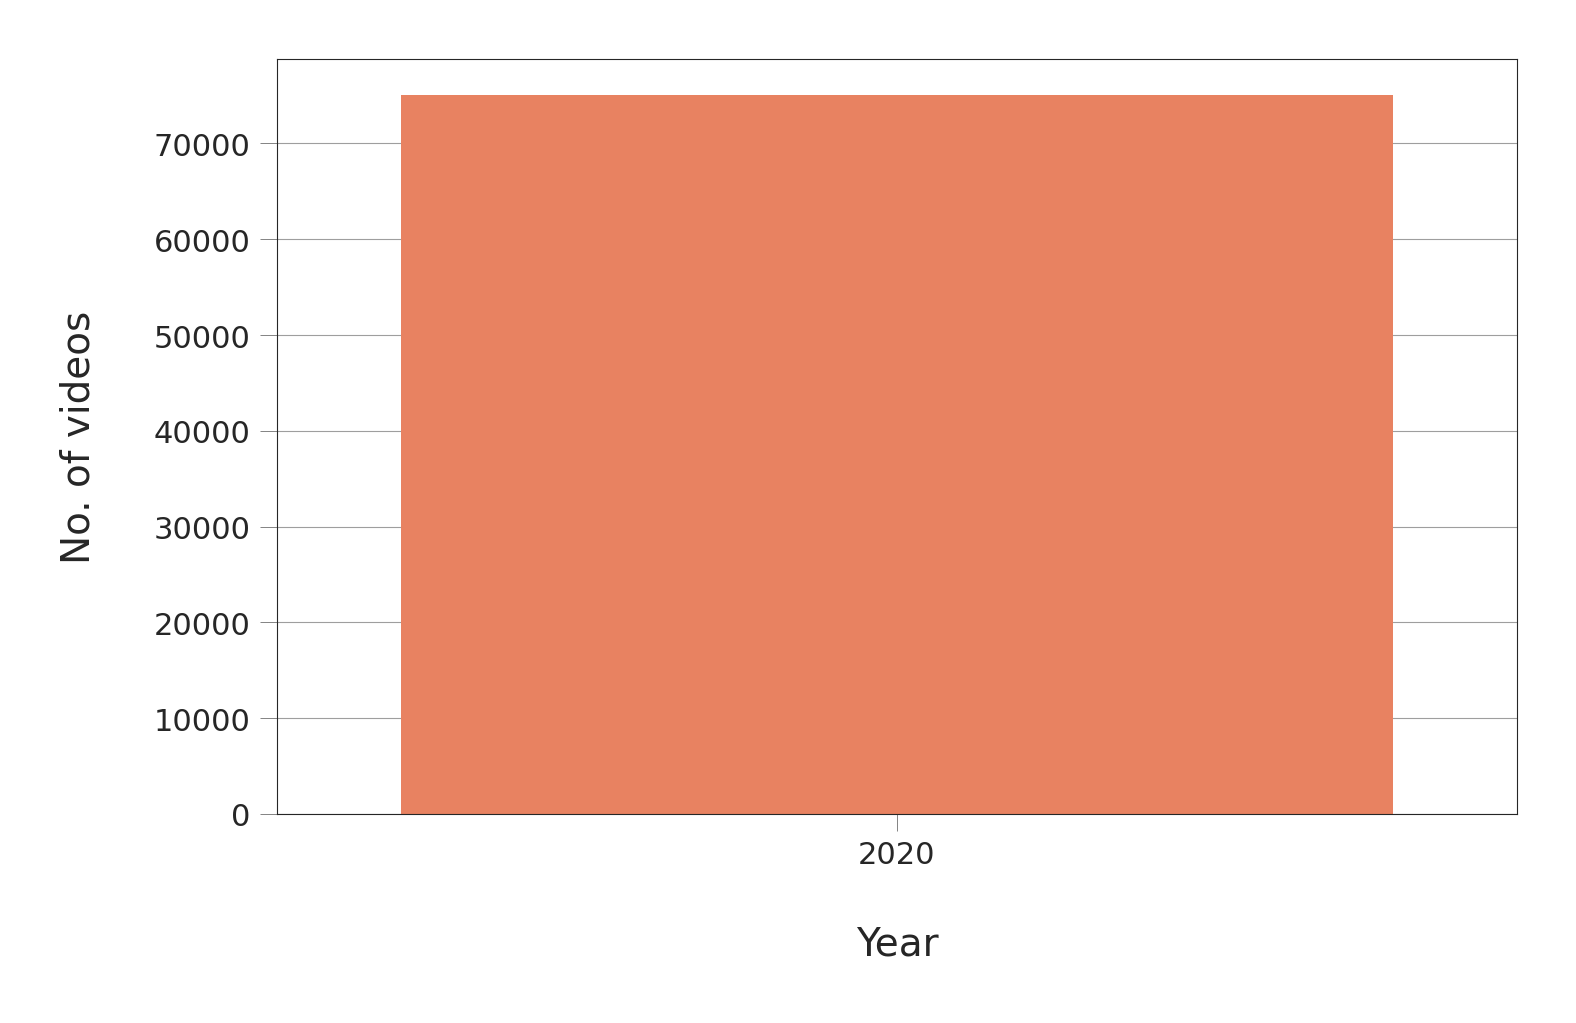

In [ ]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [ ]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2020   1.00
Name: trending_date, dtype: float64

describe dataset

In [ ]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,75058.00,75058.00,75058.00,75058.00,75058.00
mean,20.68,2913039.33,140187.44,6548.89,13812.98
std,6.27,7906932.58,451937.15,131492.09,115383.74
min,1.00,0.00,0.00,0.00,0.00
25%,20.00,412924.75,14215.00,511.00,658.00
50%,24.00,976257.50,38329.00,1341.00,1966.00
75%,24.00,2389027.75,105776.75,3643.75,6354.00
max,29.00,264407389.00,16115240.00,12341474.00,6738565.00


plot the histogram

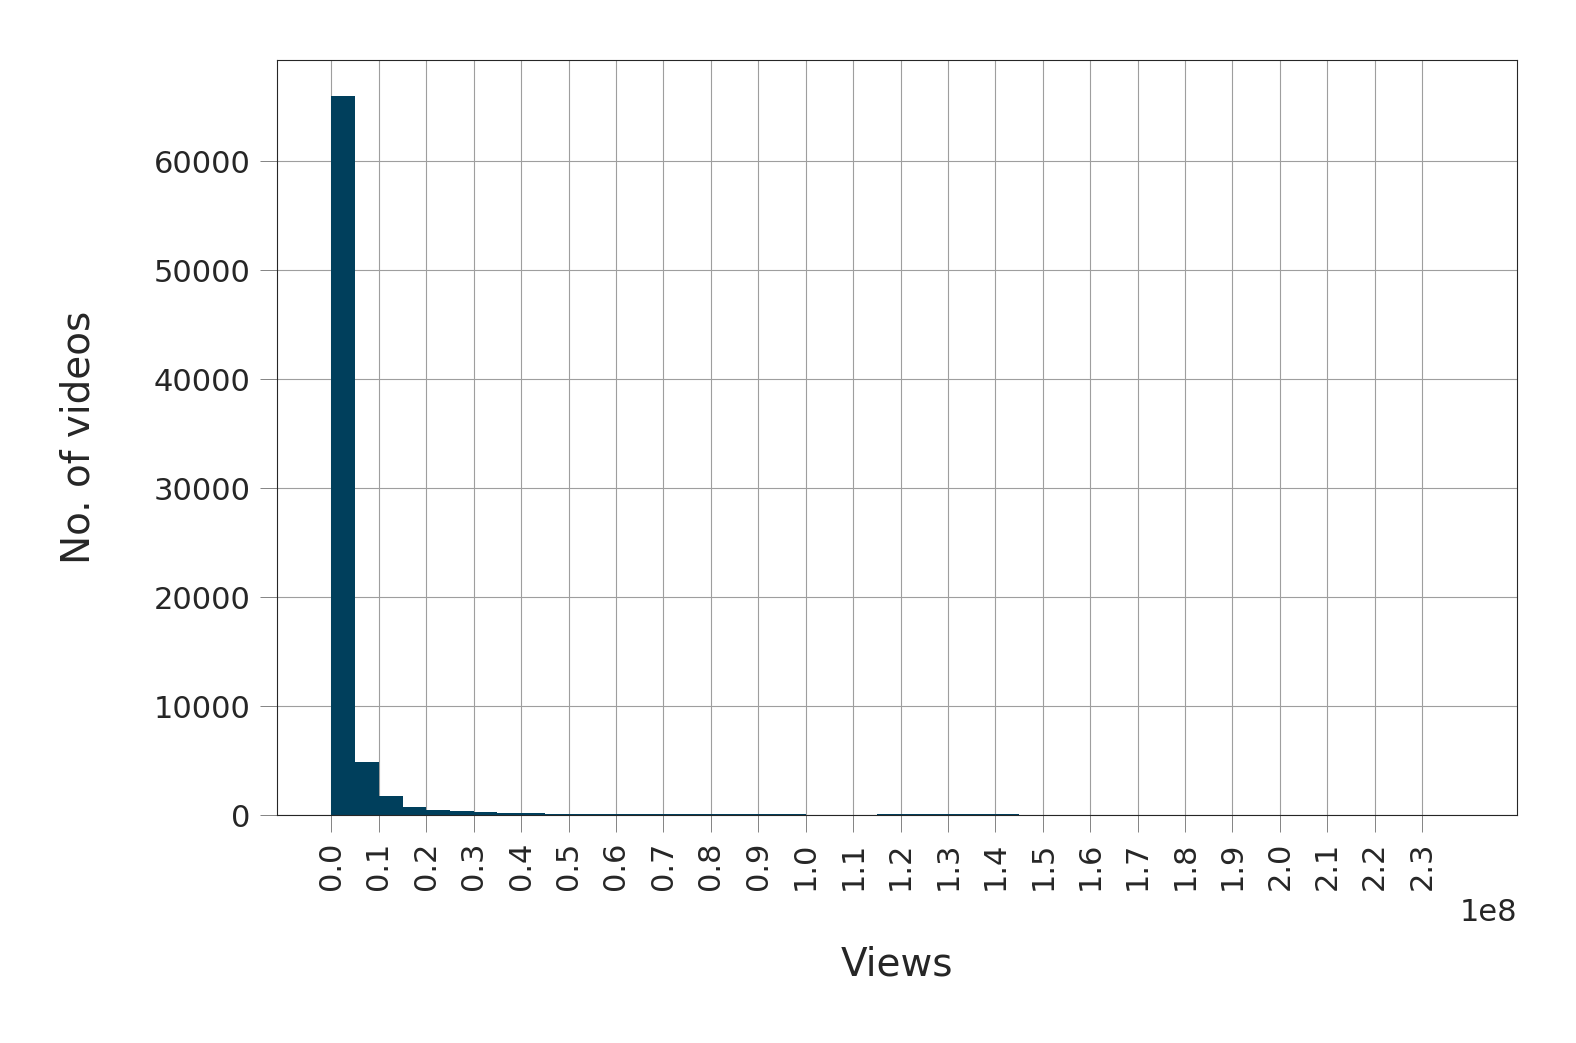

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df["view_count"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

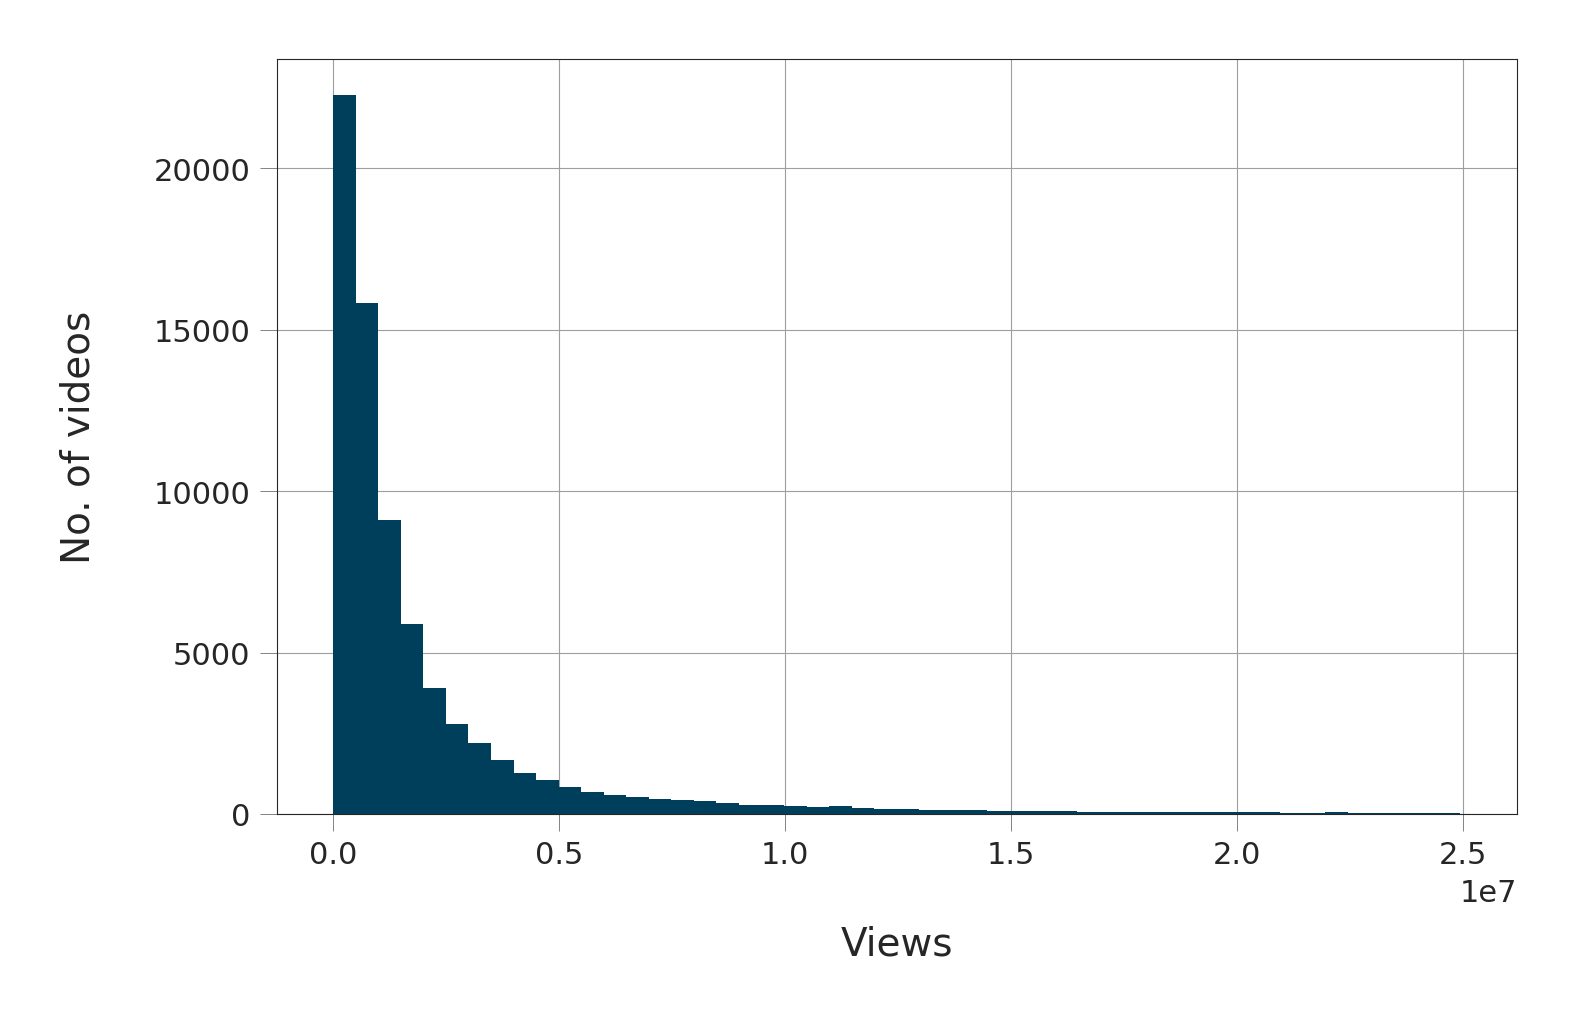

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views

In [ ]:
df[df['view_count'] < 1e6]['view_count'].count() / df['view_count'].count() * 100

50.81403714460817

So, it is around 60%. Similarly, we can see that the percentage of videos with less than 1.5 million views is around 71%, and that the percentage of videos with less than 5 million views is around 91%

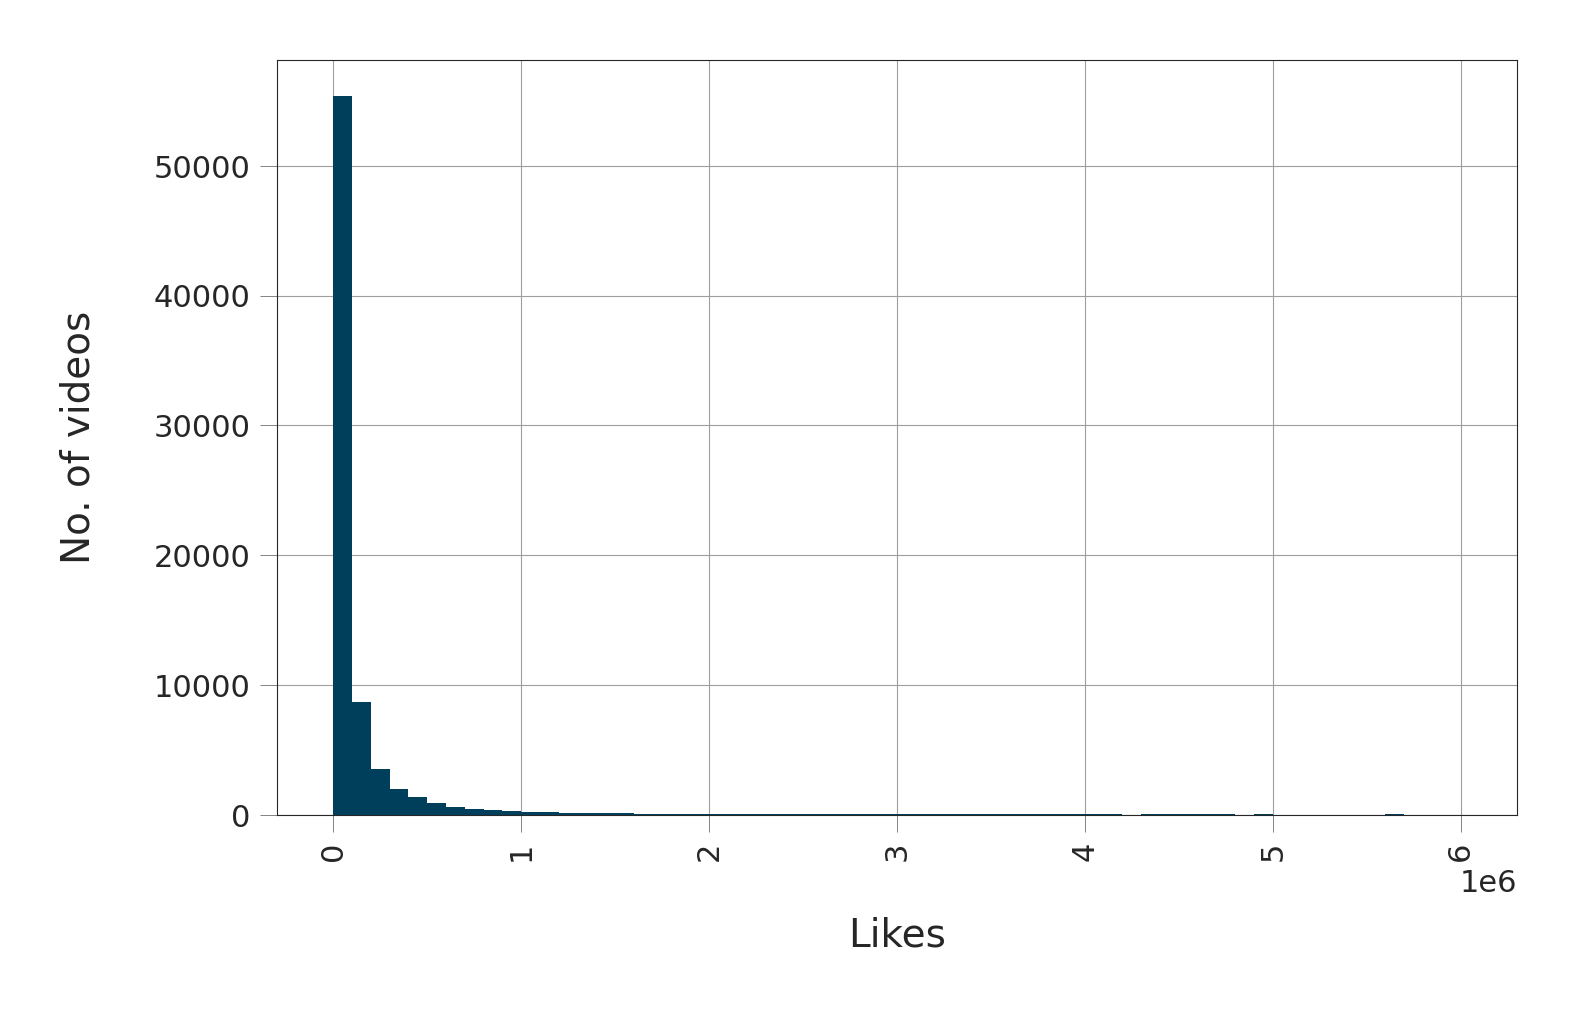

In [ ]:
#plot histogram for no. of columns
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

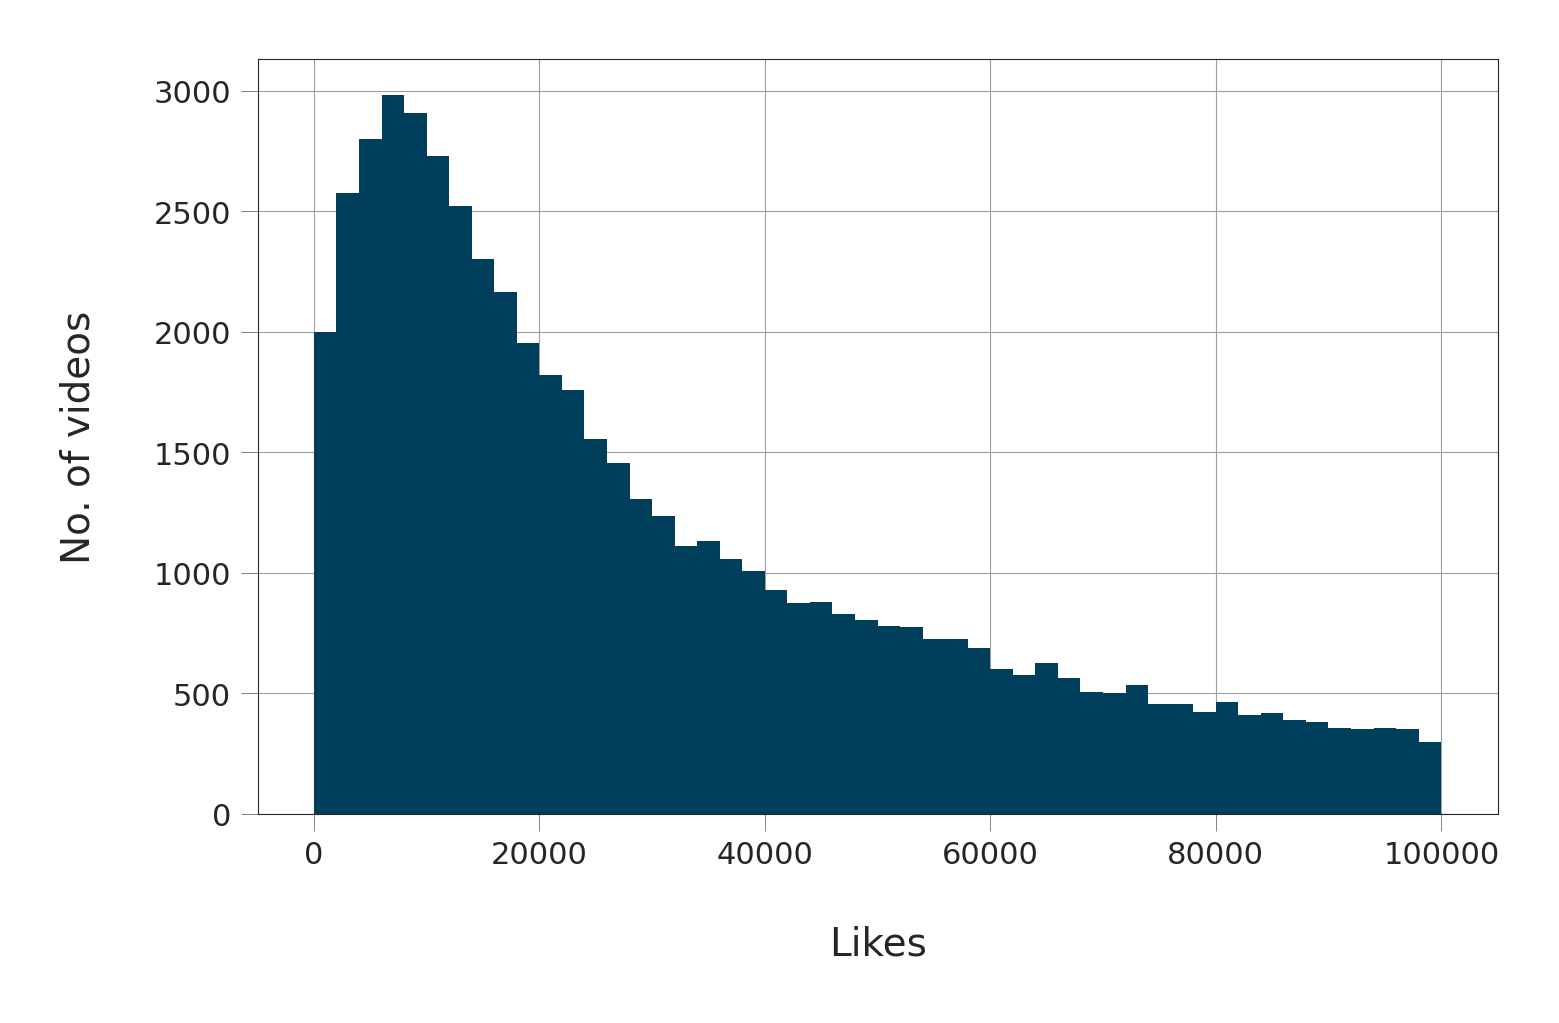

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.

Let's see the exact percentage of videos with less than 40000 likes

In [ ]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

51.12313144501586

comment count histogram

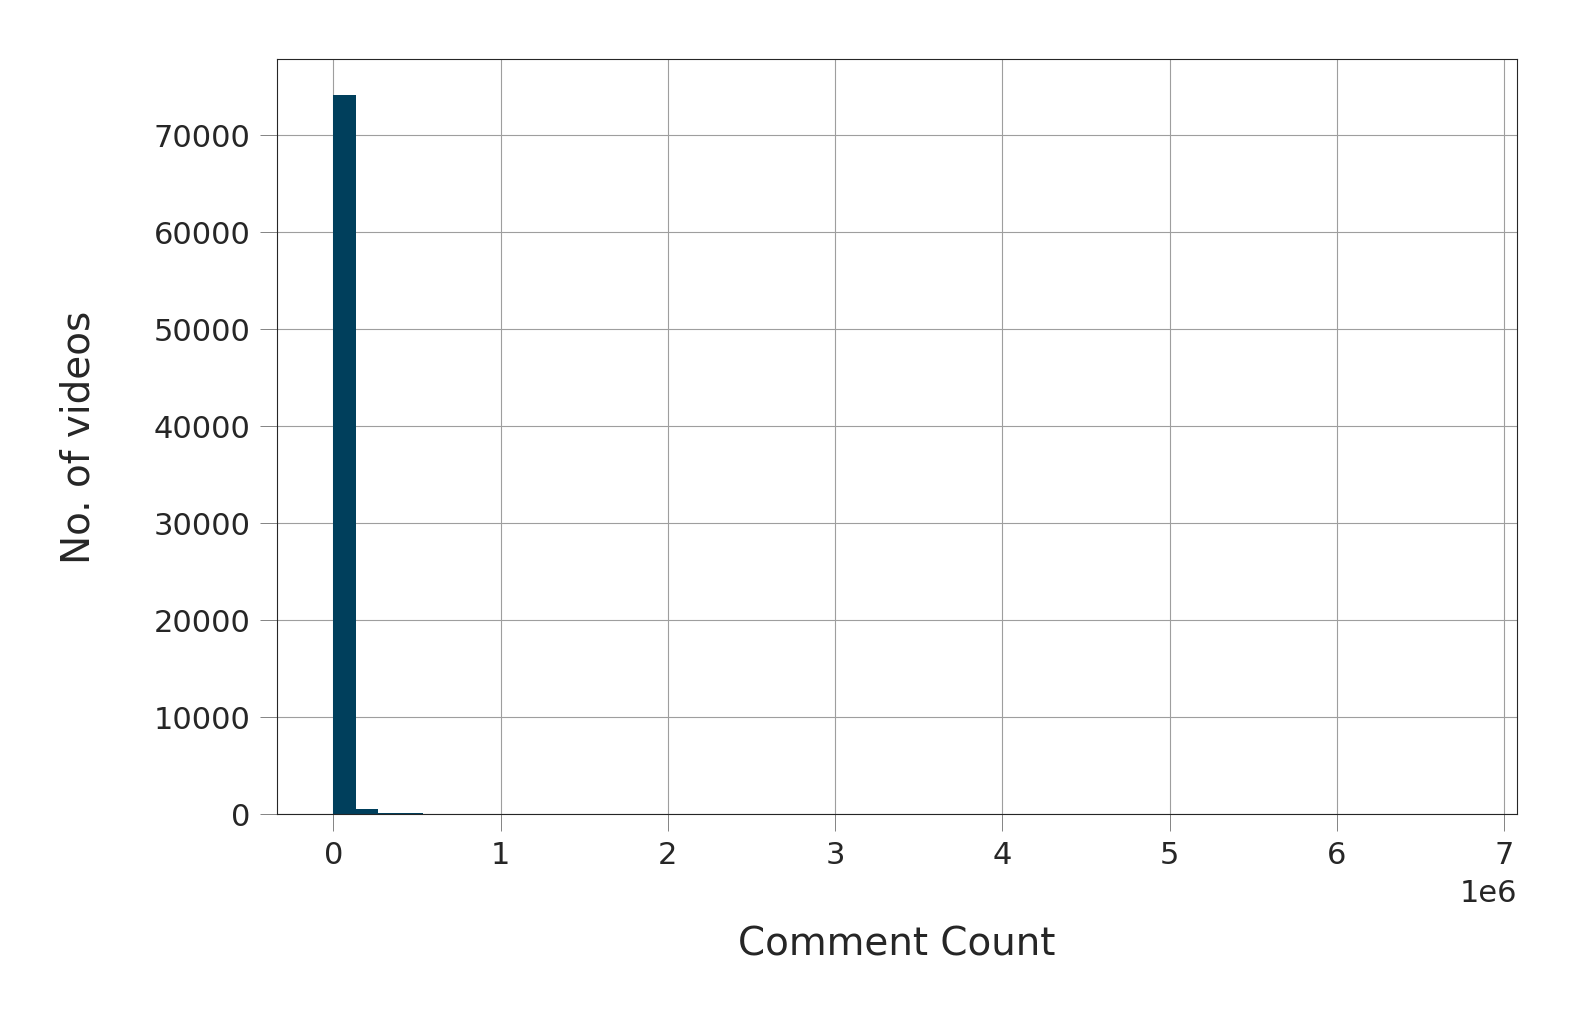

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

get closer look in histogram by eliminating some comment

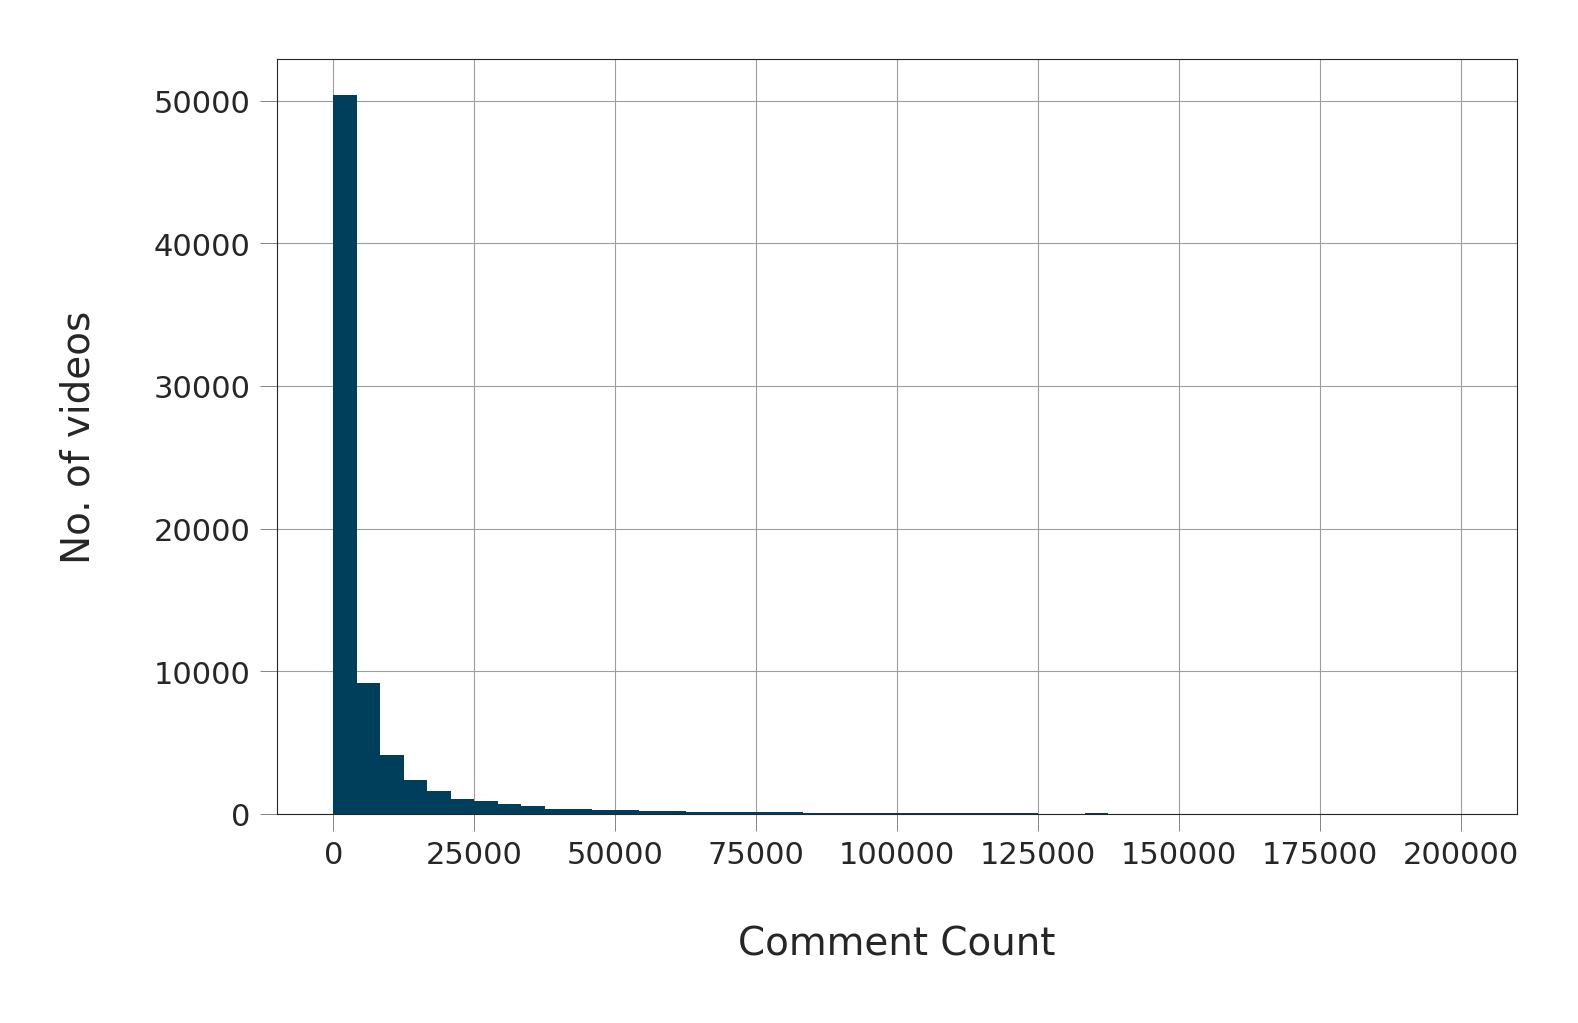

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [ ]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

66.32071198273334

Description on non-numerical columns
After we described numerical columns previously, we now describe non-numerical columns

In [ ]:
df.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,75058,75058,75058,75058,75057,75058,75058,75058,75058
unique,21373,21700,21141,2475,2525,383,14718,21374,20209
top,y_RHQ4mBDKA,Kundali Bhagya | कुंडली भाग्य | Monday - Frida...,2021-06-04T18:15:01Z,UCvrhwpnp2DHYQ1CbXby9ypQ,Vijay Television,2021-03-02T00:00:00Z,[None],https://i.ytimg.com/vi/y_RHQ4mBDKA/default.jpg,
freq,19,37,20,1107,1107,398,8694,19,1742


f

In [ ]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
36435,-1ImKHHc7Ck,#SarangaDariya | Lovestory Songs | Naga Chaita...,2021-02-26T07:12:50Z,UCNApqoVYJbYSrni4YsbXzyQ,Aditya Music,10,2021-02-27T00:00:00Z,saranga dariya song|saranga dariya sai Pallavi...,3402887,107026,1569,2456,https://i.ytimg.com/vi/-1ImKHHc7Ck/default.jpg,False,False,Presenting Saranga Dariya Song From #Lovestory...
36693,-1ImKHHc7Ck,#SarangaDariya Promo | Lovestory Songs | Naga ...,2021-02-26T07:12:50Z,UCNApqoVYJbYSrni4YsbXzyQ,Aditya Music,10,2021-03-01T00:00:00Z,saranga dariya song|saranga dariya sai Pallavi...,5124324,131096,2252,2767,https://i.ytimg.com/vi/-1ImKHHc7Ck/default.jpg,False,False,Presenting Saranga Dariya Song From #Lovestory...
36926,-1ImKHHc7Ck,#SarangaDariya Promo | Lovestory Songs | Naga ...,2021-02-26T07:12:50Z,UCNApqoVYJbYSrni4YsbXzyQ,Aditya Music,10,2021-03-02T00:00:00Z,saranga dariya song|saranga dariya sai Pallavi...,5364529,133158,2326,2781,https://i.ytimg.com/vi/-1ImKHHc7Ck/default.jpg,False,False,Presenting Saranga Dariya Song From #Lovestory...
37128,-1ImKHHc7Ck,#SarangaDariya Promo | Lovestory Songs | Naga ...,2021-02-26T07:12:50Z,UCNApqoVYJbYSrni4YsbXzyQ,Aditya Music,10,2021-03-02T00:00:00Z,saranga dariya song|saranga dariya sai Pallavi...,5430997,134037,2358,2789,https://i.ytimg.com/vi/-1ImKHHc7Ck/default.jpg,False,False,Presenting Saranga Dariya Song From #Lovestory...
37369,-1ImKHHc7Ck,#SarangaDariya Promo | Lovestory Songs | Naga ...,2021-02-26T07:12:50Z,UCNApqoVYJbYSrni4YsbXzyQ,Aditya Music,10,2021-03-03T00:00:00Z,saranga dariya song|saranga dariya sai Pallavi...,5658964,135771,2422,2815,https://i.ytimg.com/vi/-1ImKHHc7Ck/default.jpg,False,False,Presenting Saranga Dariya Song From #Lovestory...


How many trending video titles contain capitalized word?

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


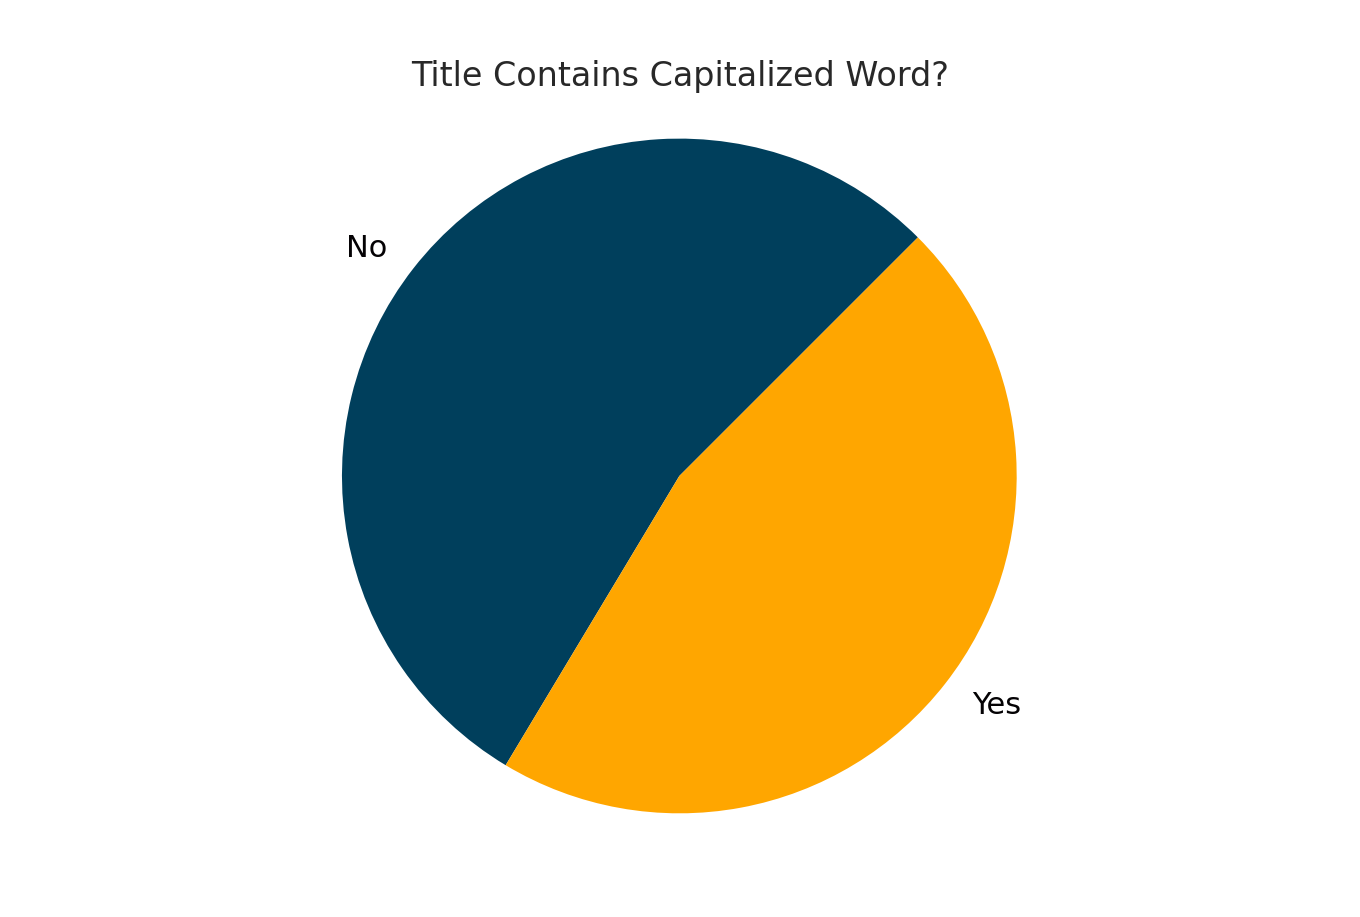

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.54
True    0.46
Name: contains_capitalized, dtype: float64

Video title lengths
Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trnding video titles

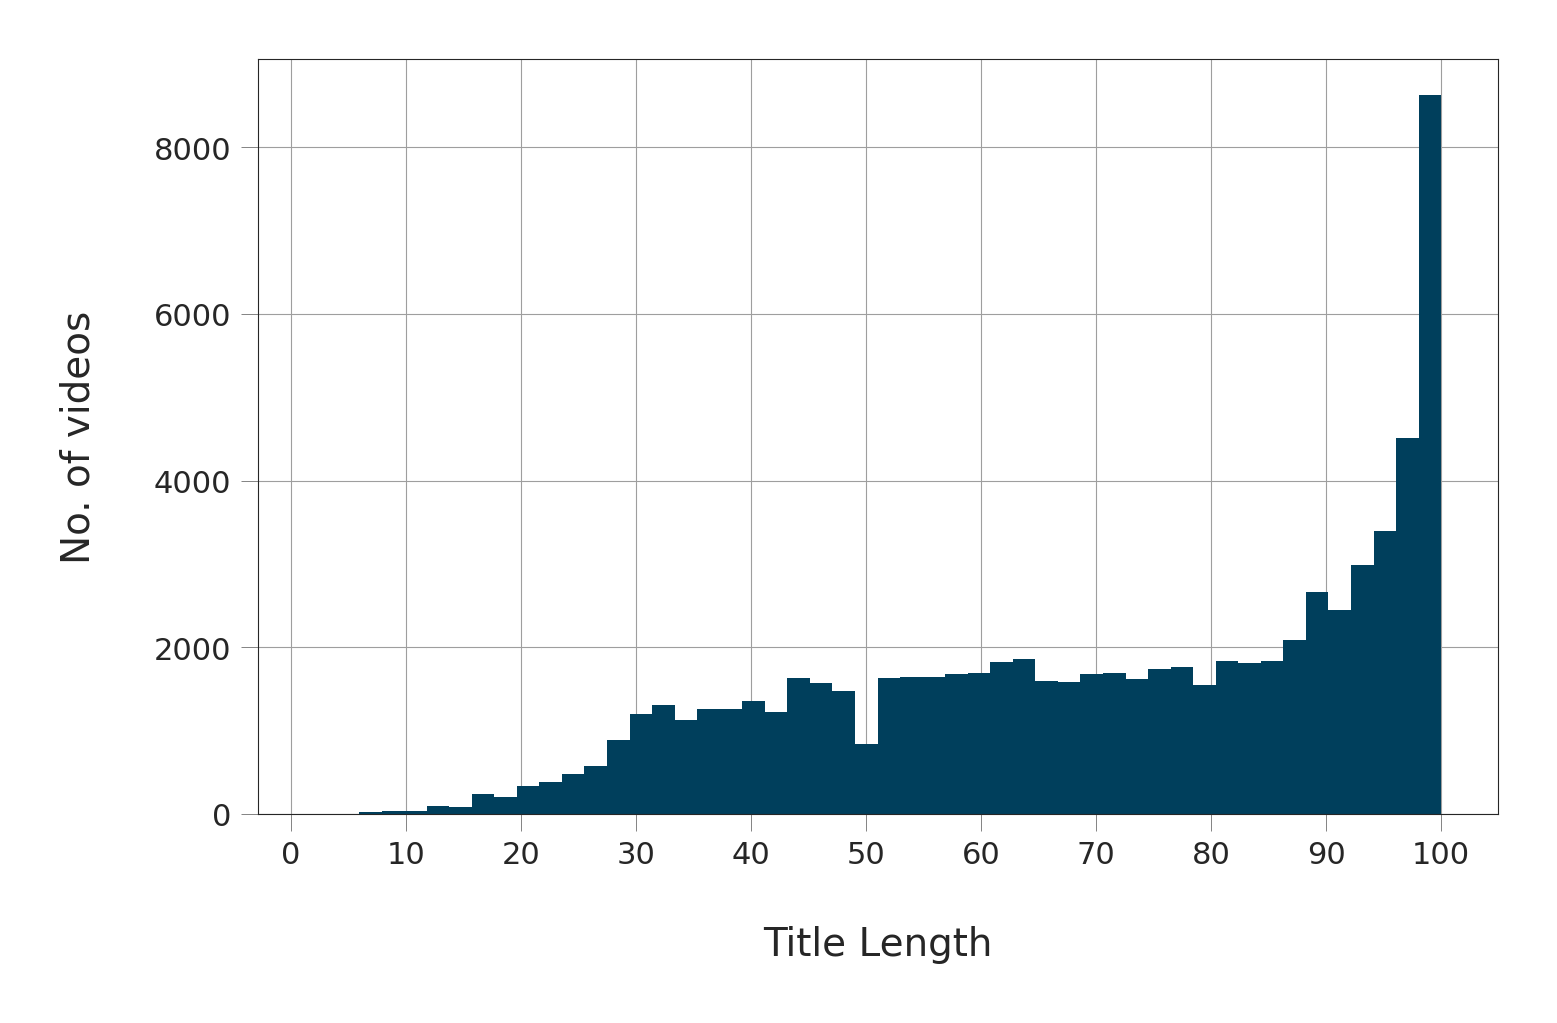

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables

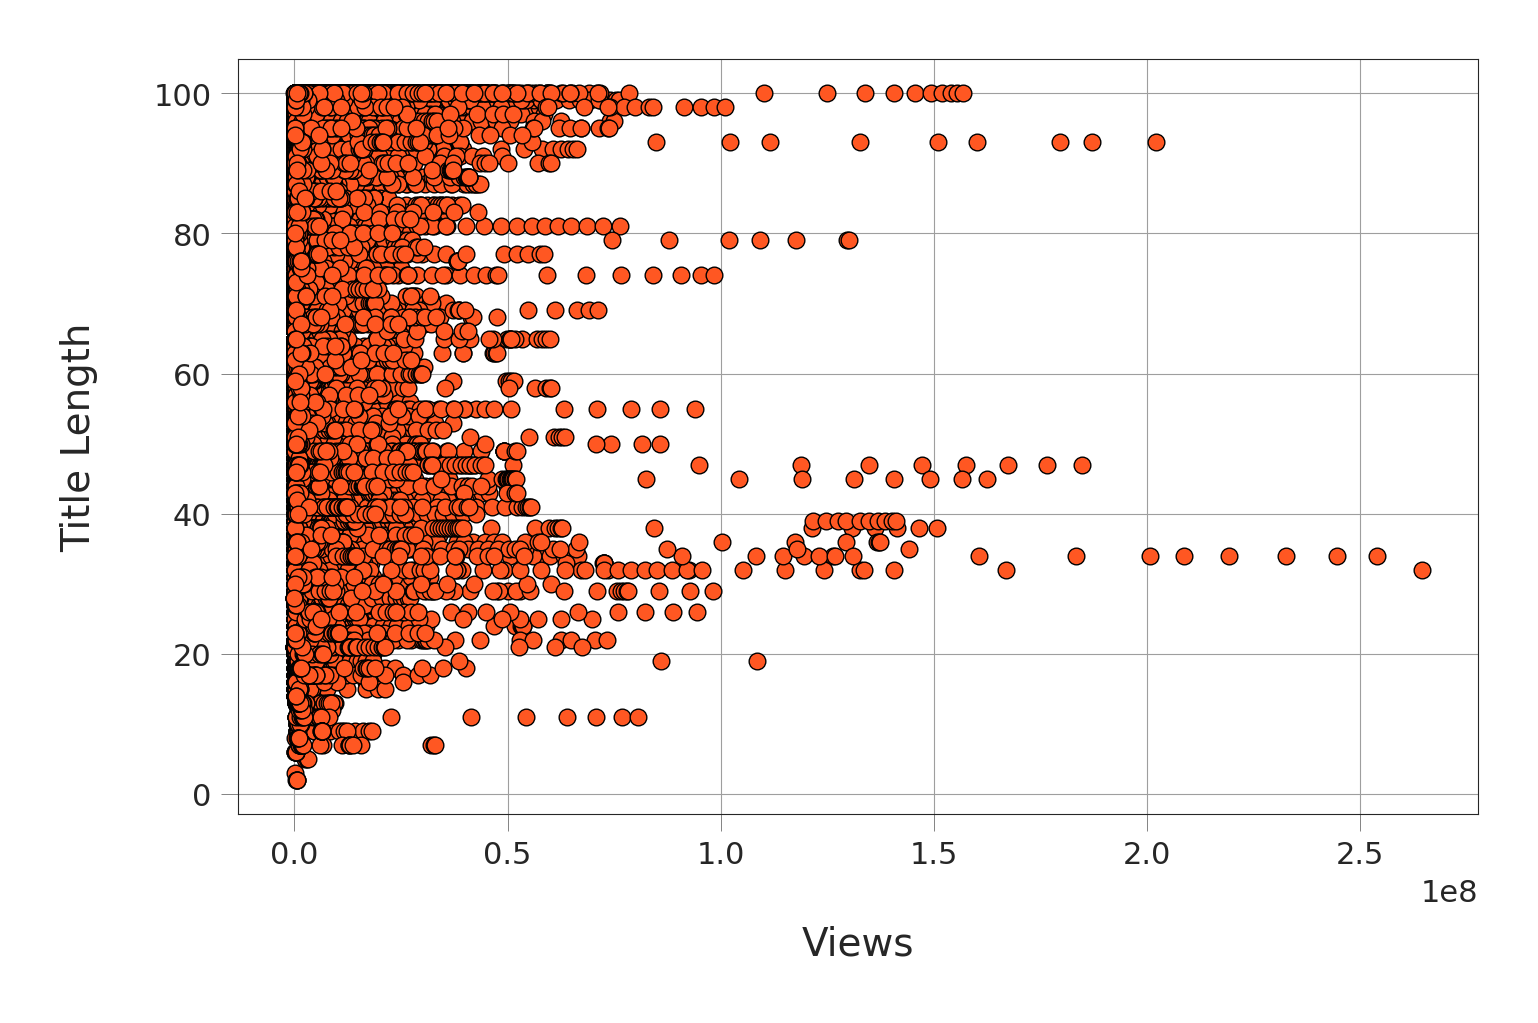

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

Correlation between dataset variables


In [ ]:
df.corr()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,contains_capitalized,title_length
categoryId,1.00,-0.16,-0.15,-0.01,-0.11,0.04,0.00,-0.07,-0.20
view_count,-0.16,1.00,0.78,0.16,0.55,0.01,0.04,0.03,-0.02
likes,-0.15,0.78,1.00,0.09,0.74,-0.02,-0.03,0.07,-0.12
dislikes,-0.01,0.16,0.09,1.00,0.16,-0.00,-0.00,-0.01,0.01
comment_count,-0.11,0.55,0.74,0.16,1.00,-0.01,-0.01,0.05,-0.05
comments_disabled,0.04,0.01,-0.02,-0.00,-0.01,1.00,0.05,-0.02,-0.02
ratings_disabled,0.00,0.04,-0.03,-0.00,-0.01,0.05,1.00,0.00,0.02
contains_capitalized,-0.07,0.03,0.07,-0.01,0.05,-0.02,0.00,1.00,0.06
title_length,-0.20,-0.02,-0.12,0.01,-0.05,-0.02,0.02,0.06,1.00


heatmap of above correlation

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


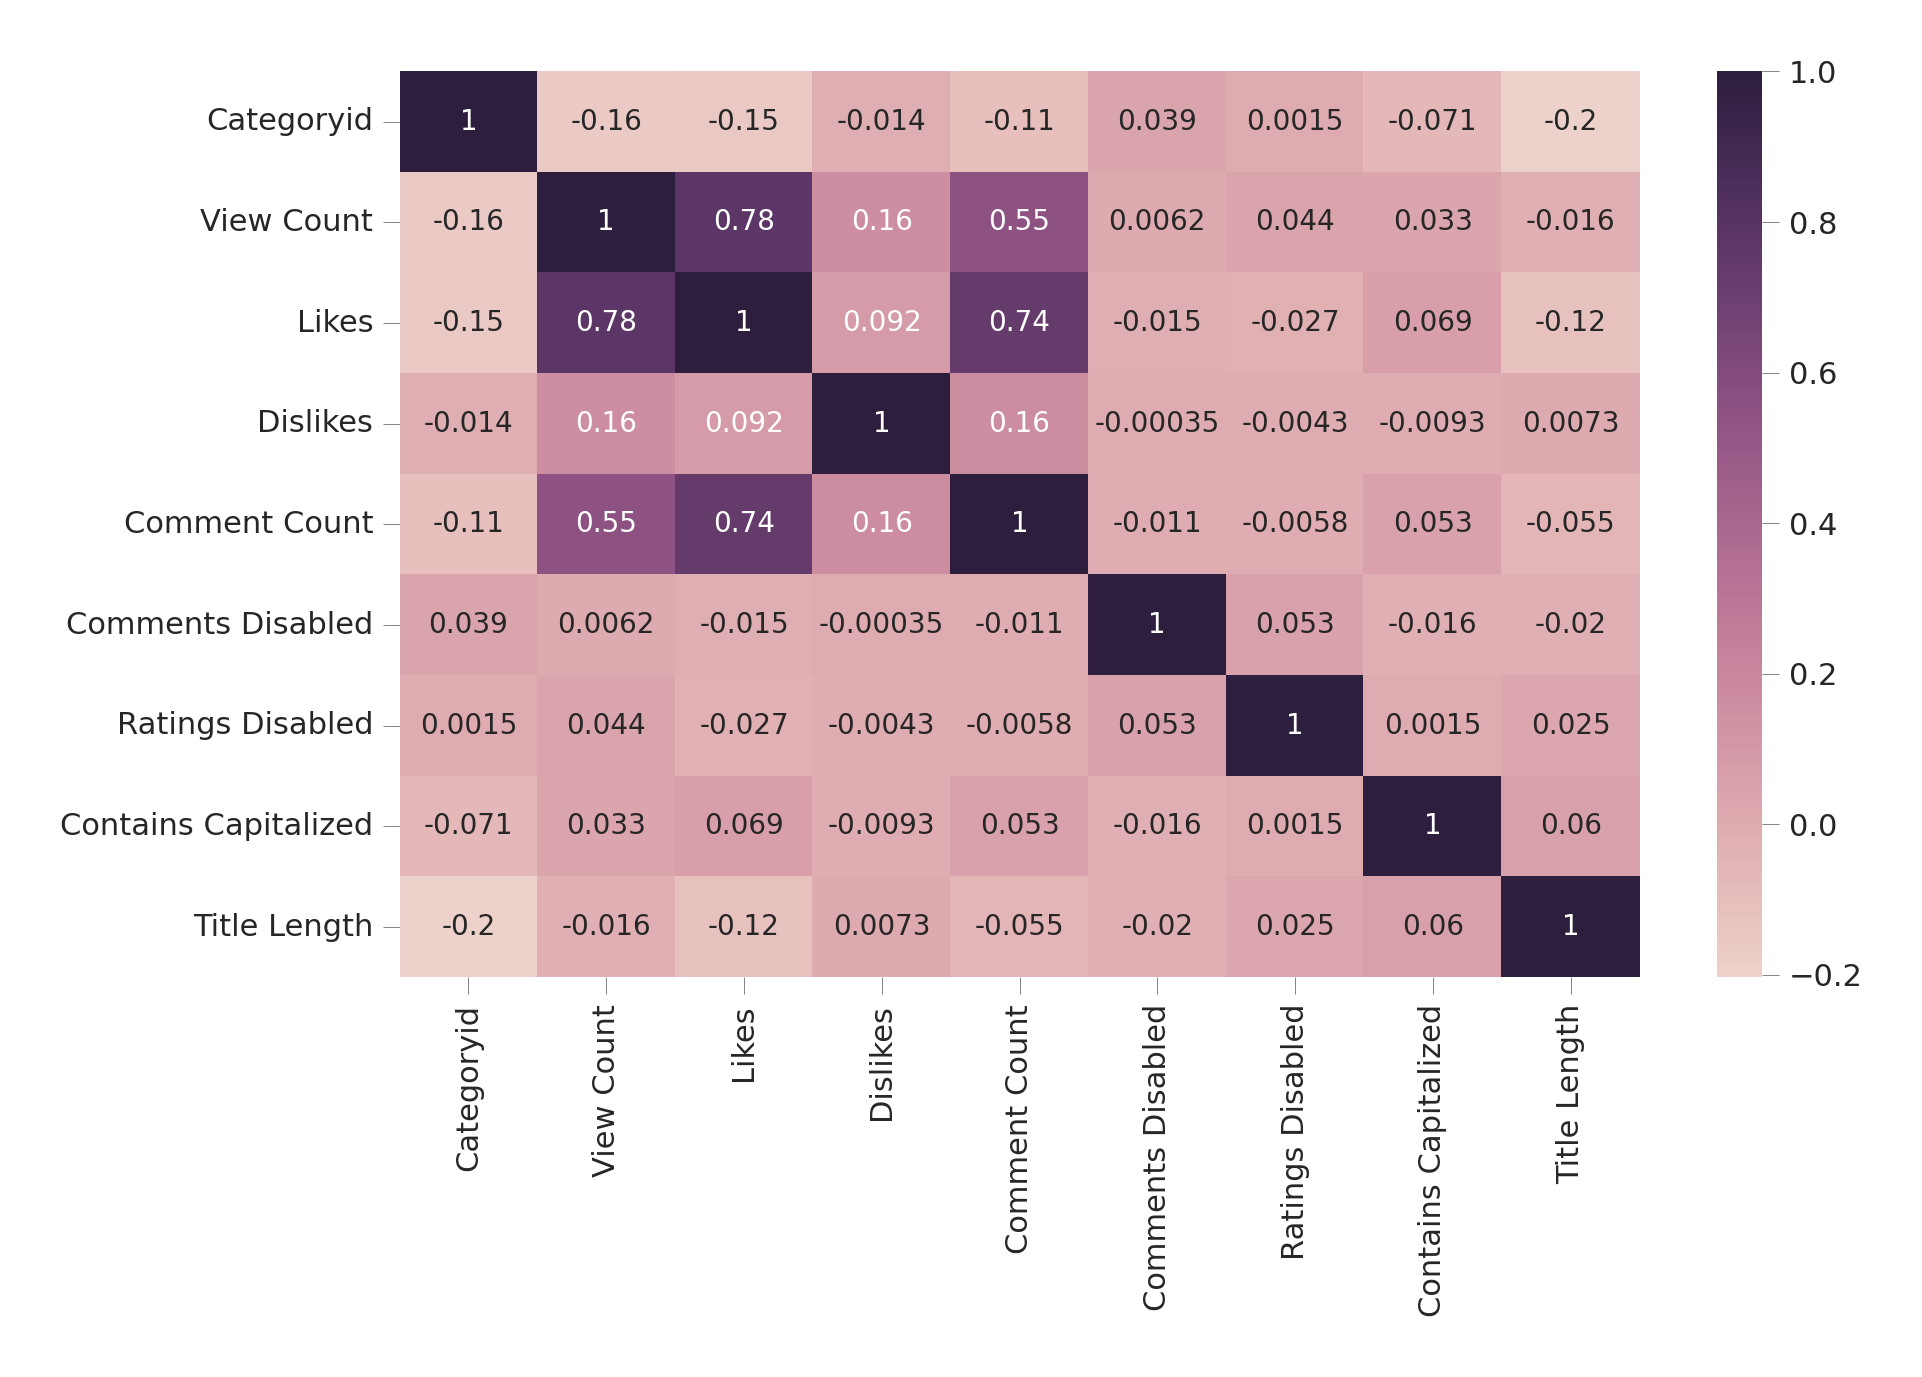

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [ ]:
#scatterplot of corr

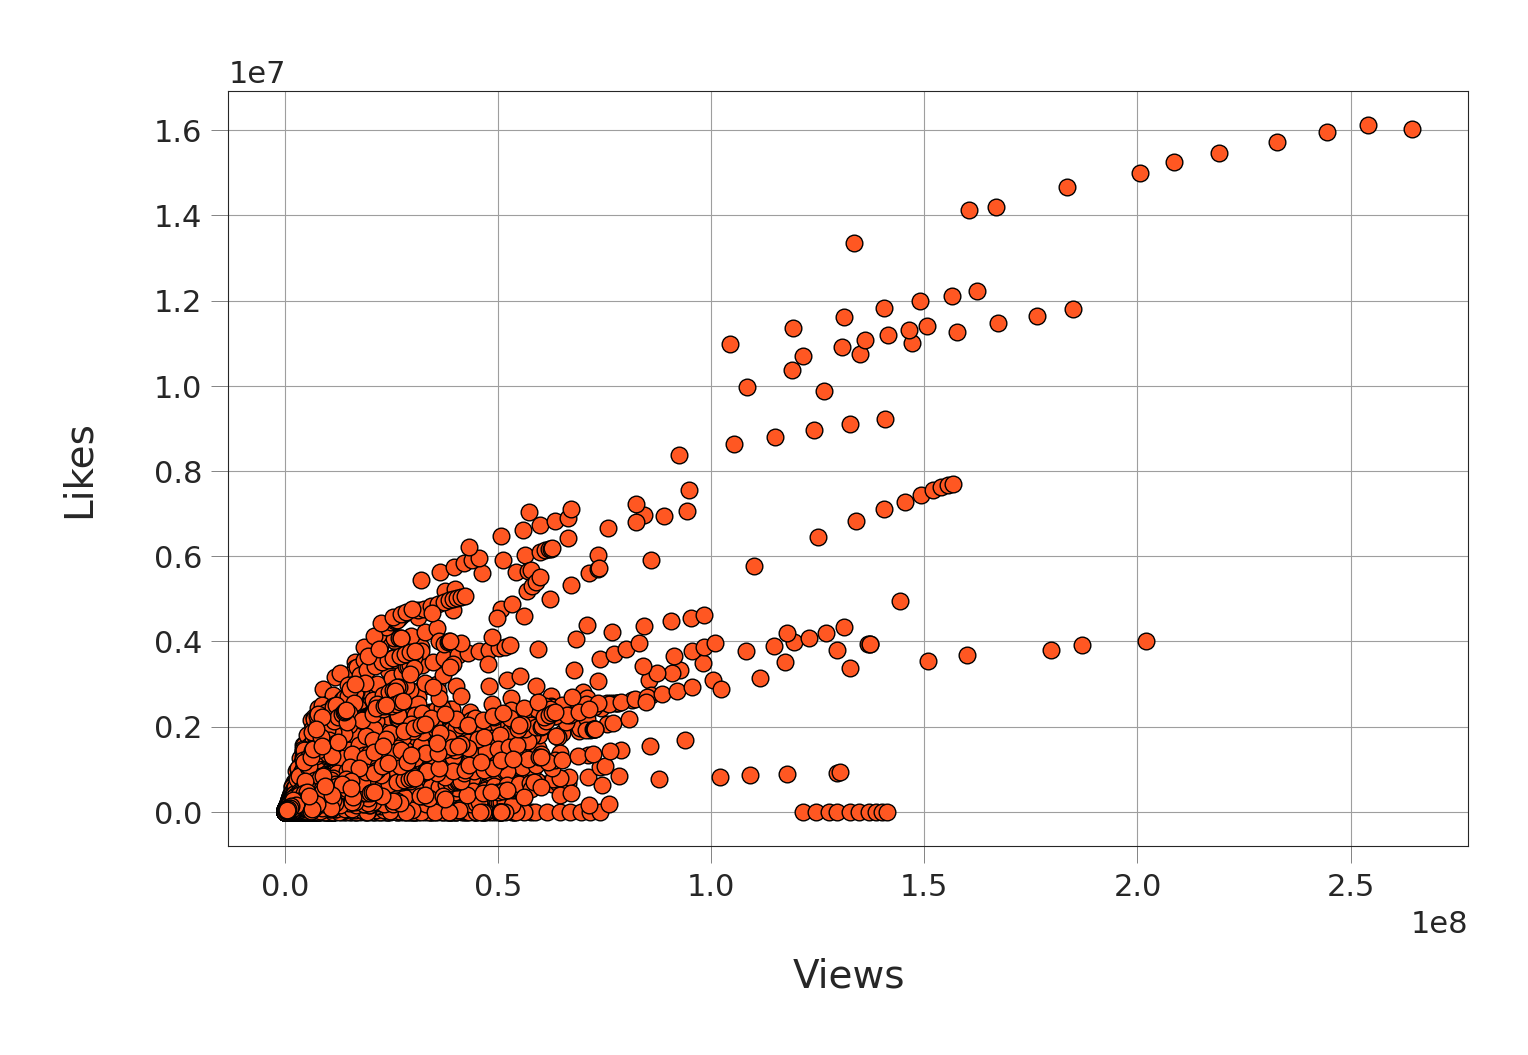

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['view_count'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

most common words in video titles

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 111276),
 ('-', 21088),
 ('||', 12851),
 ('2021', 7736),
 ('&', 5699),
 ('2020', 5347),
 ('Episode', 4881),
 ('Song', 4278),
 ('New', 4244),
 ('Punjabi', 4160),
 ('Songs', 3752),
 ('2', 3611),
 ('The', 3434),
 ('Video', 3433),
 ('Latest', 3432),
 ('Official', 3125),
 ('Promo', 2834),
 ('TV', 2823),
 ('Video)', 2654),
 ('Ka', 2586),
 ('in', 2490),
 ('to', 2470),
 ('Serial', 2343),
 ('(Official', 2181),
 ('Media', 2171)]

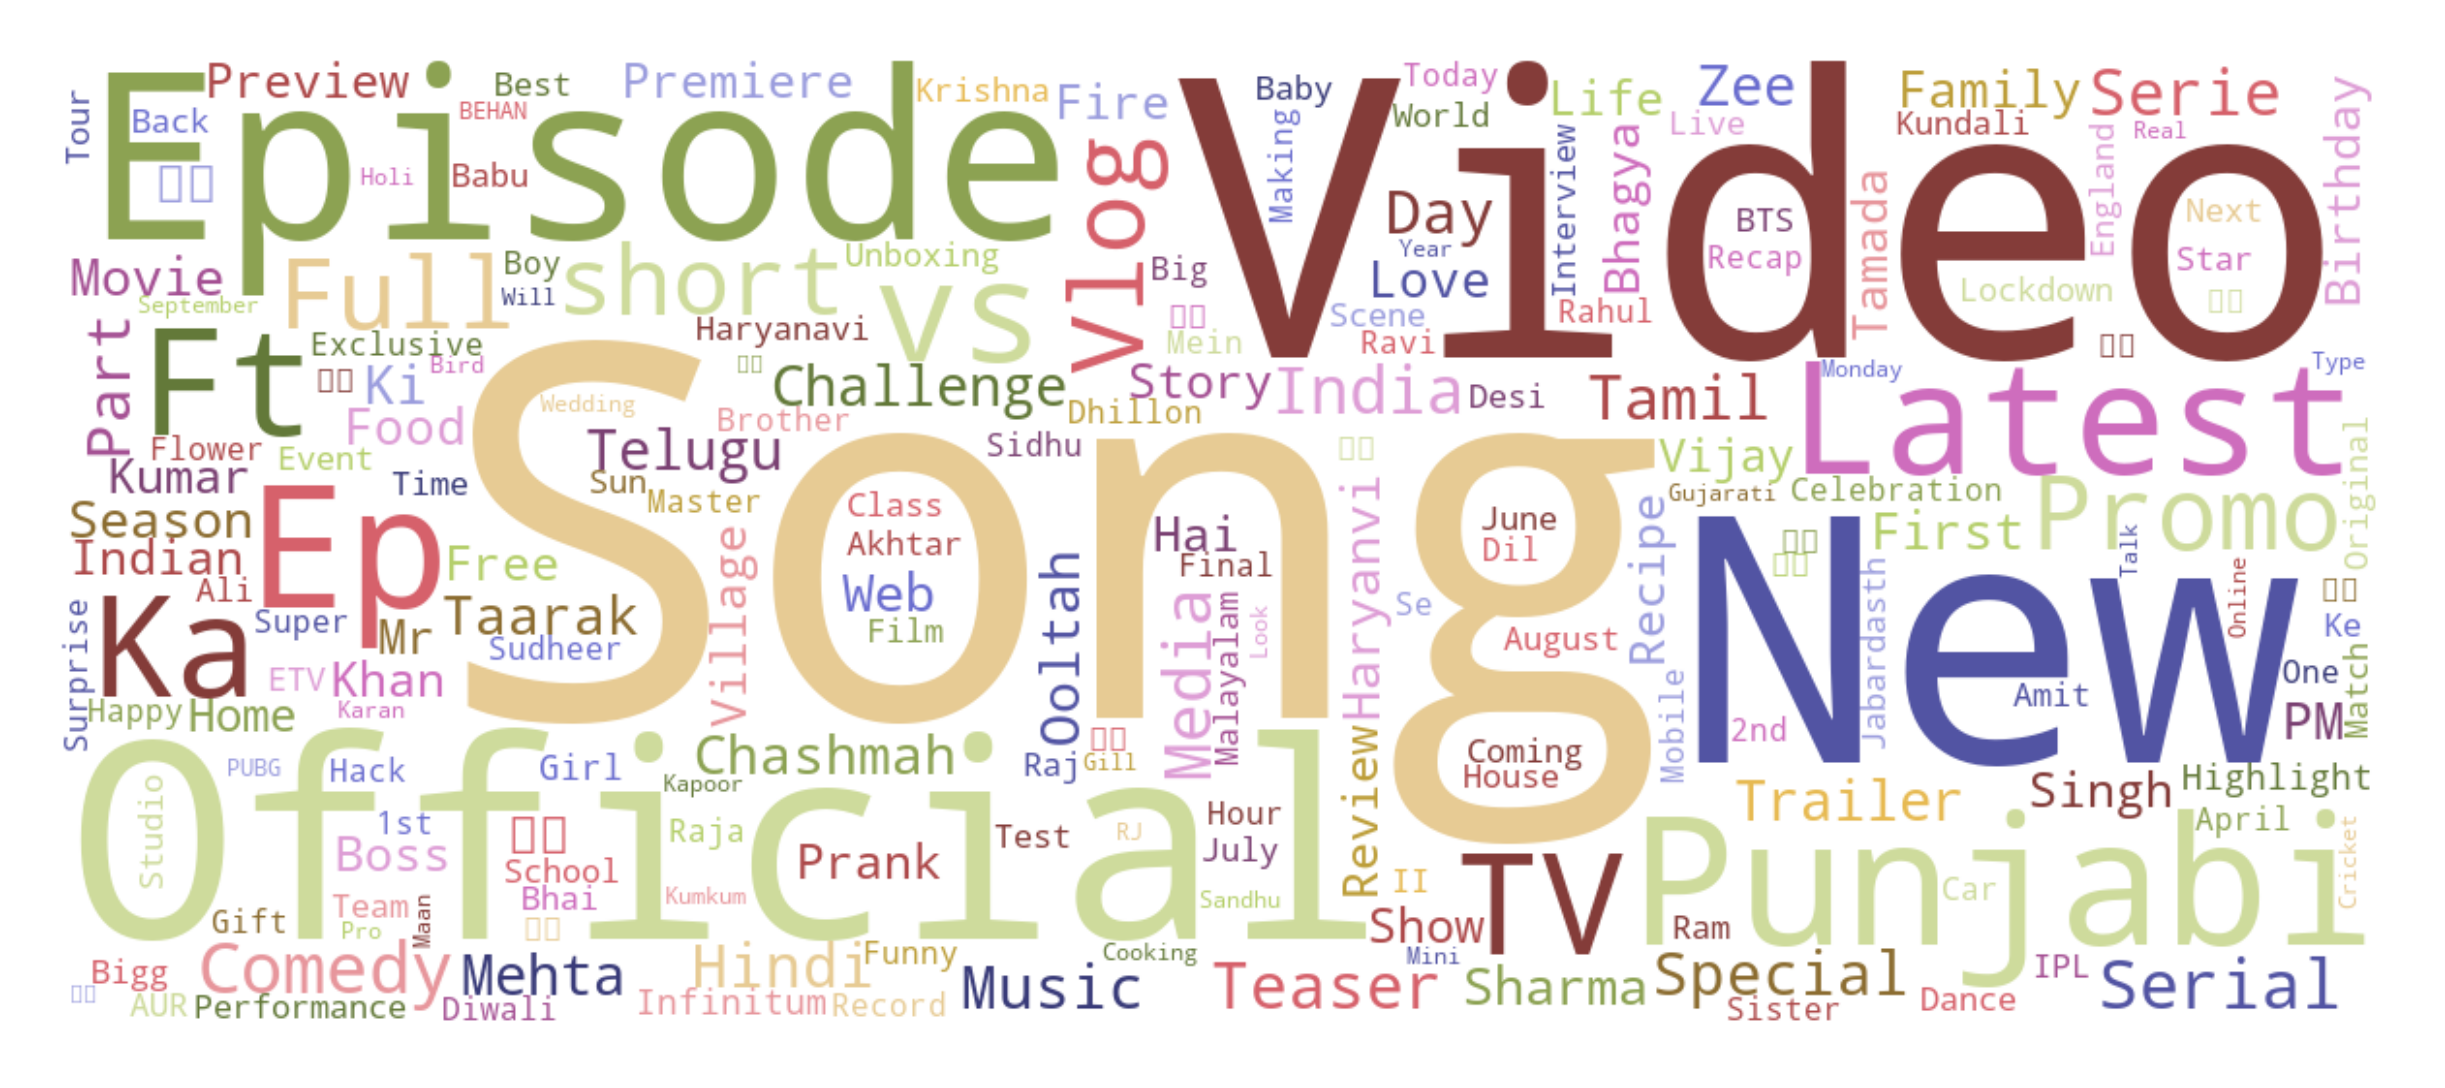

In [ ]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

Which channels have the largest number of trending videos?


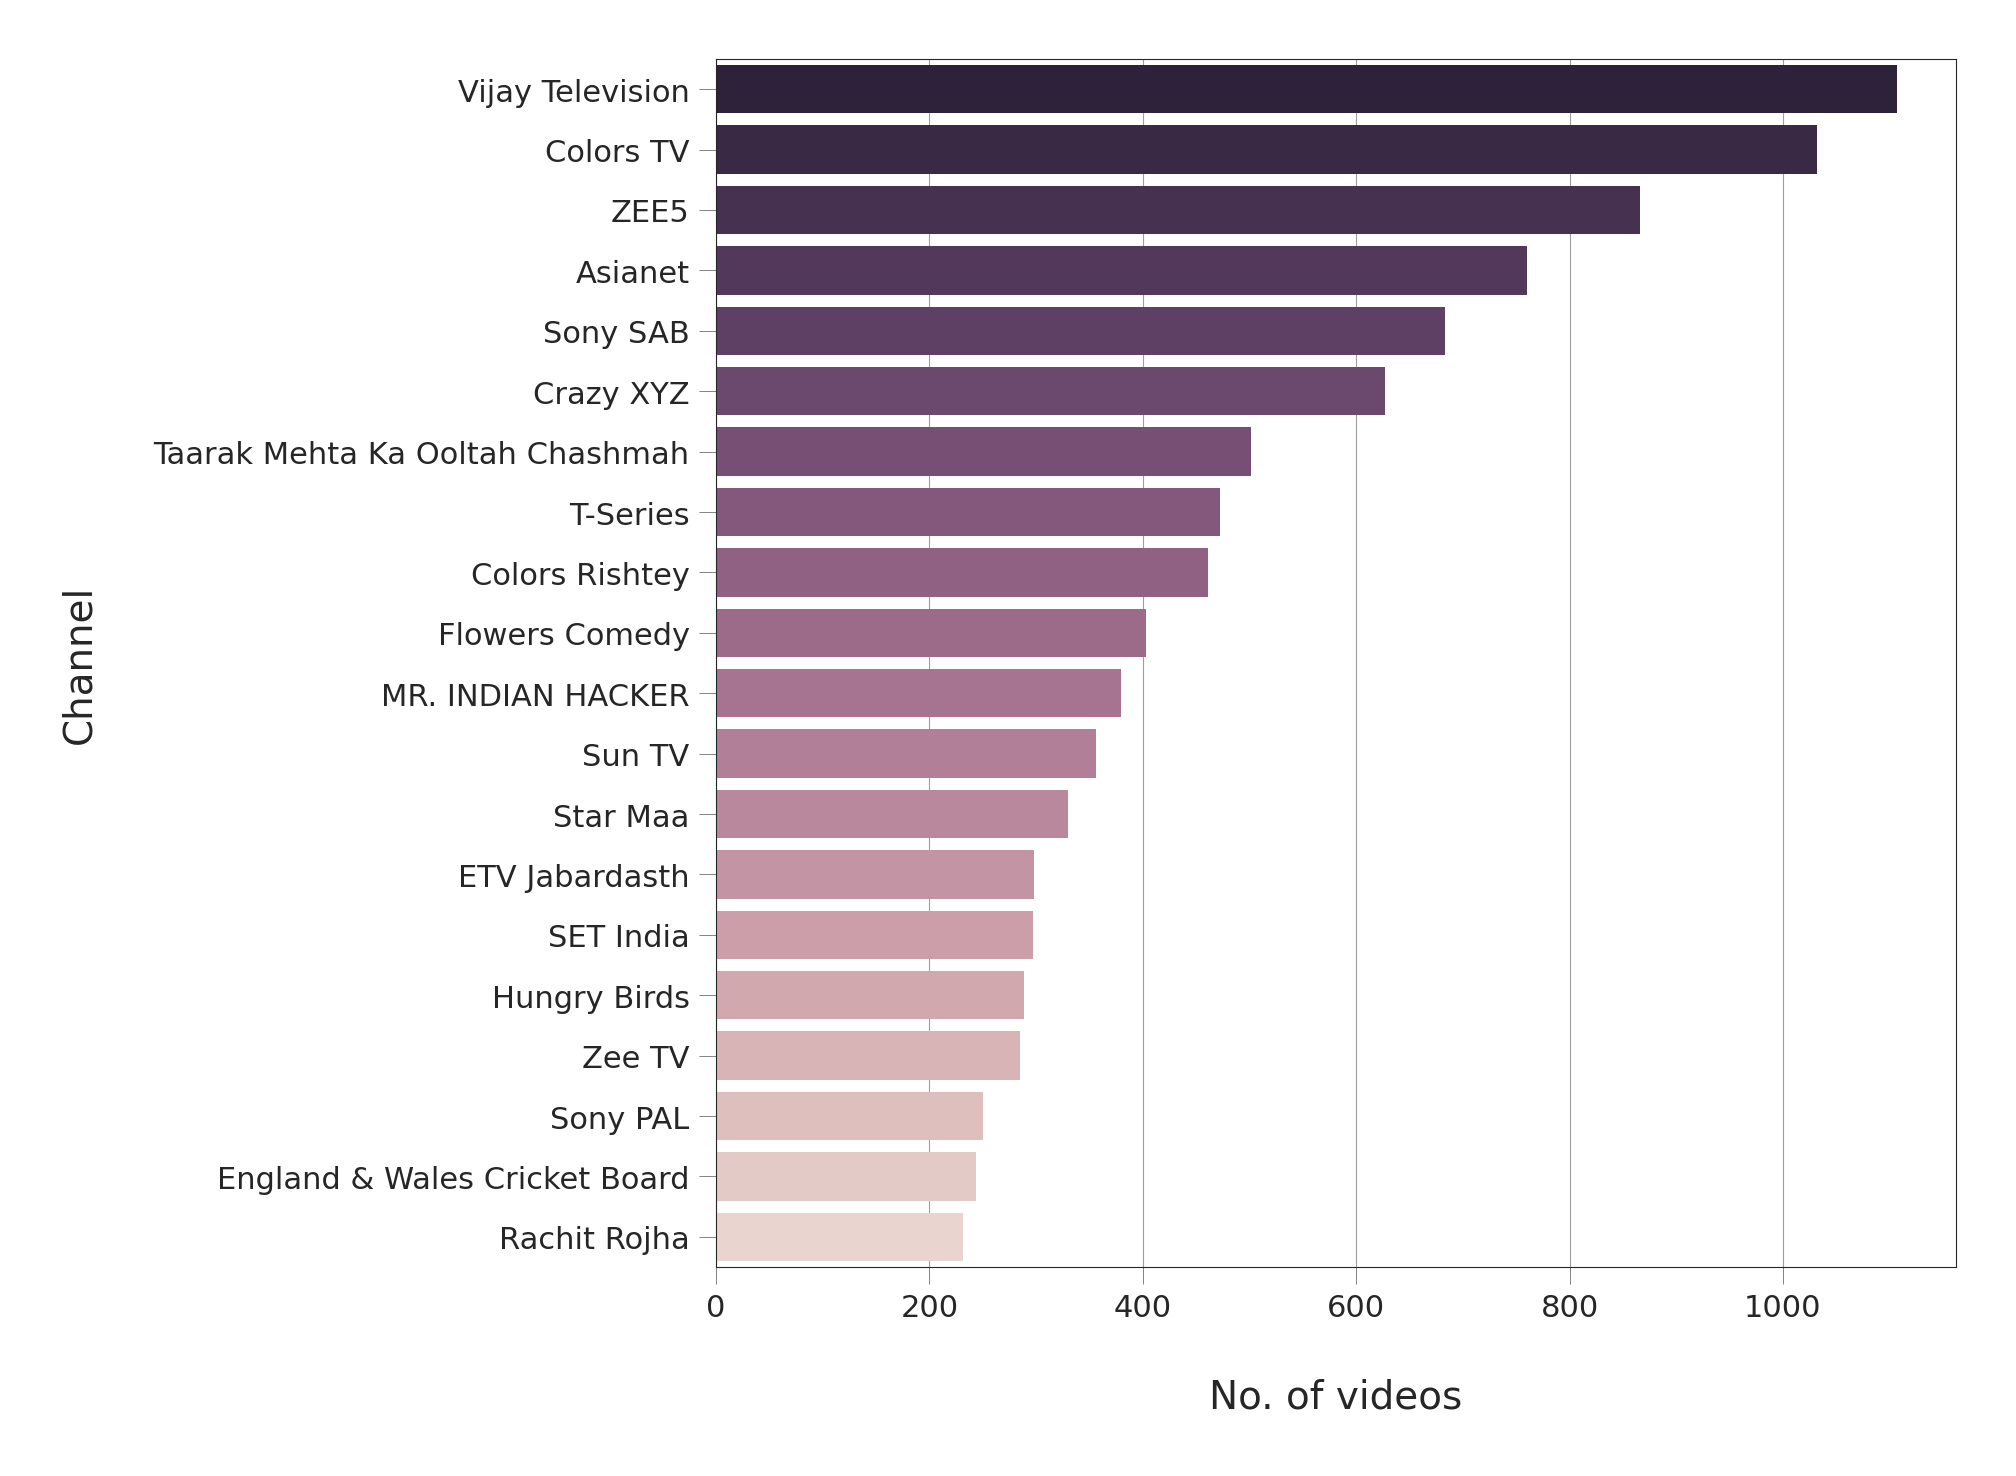

In [ ]:
cdf = df.groupby("channelTitle").size().reset_index(name="view_count") \
    .sort_values("view_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="view_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")




**Conclusions**

We analyzed a dataset that contains information about YouTube trending videos 
for 205 days. The dataset was collected in 2020. It contains 75058 video entry.

46% of trending videos were Capitalized title, and 54% were not Capitalized title.

67% of trending videos have less than 4,000 comments, and 93% have less than 25,000 comments.

Trending videos that have 100,000,000 views and more have title length between 33 and 55 characters approximately.

The words 'Official', 'Video', 'Song', 'New', and 'Punjabi' were common also in trending video titles.


